In [5]:
import os
import glob
from rasterio.windows import Window
import rasterio
import json
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Polygon
import pyproj
import math
from rasterio import transform
import pickle as pkl
from tqdm import tqdm
from tensorflow import keras
import multiprocessing.dummy as mp 
from functools import partial
import timeit
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
%matplotlib inline
from matplotlib import pyplot
from rasterio.plot import show
from sklearn.preprocessing import MinMaxScaler
from numpy import median
import os
import shutil
import io
import requests
import matplotlib.pyplot as plt

In [6]:
import satellite_images_nso.api.sat_manipulator as sat_manipulator
import satellite_images_nso.miscellaneous.miscellaneous as nso_miscellaneous
from satellite_images_nso.__normalisation import normalisation

In [4]:
# Switch coors for crs here
nso_miscellaneous.switch_crs([52.32926567873281  ], [4.519029232741704], 4326, 28992 )

Latitude_orginal  Longitude_orginal                      geometry
0         52.329266           4.519029  POINT (95820.060 482724.348)

In [ ]:
#blackspots in waterleiding duinen from wgs84 to new RD
Y_blackspot = 52.329134653707435
X_blackspot = 4.527157064969839
Y_blackspot = 96374
X_blackspot = 482704

Y_blackspot_2 = 96369.528 
X_blackspot_2 = 482677.768

Y_blackspot_3 = 95820.060
X_blackspot_3 = 482724.348

In [3]:
for file in glob.glob("C:/repos/satellite-images-nso/output/*50cm*aaneensluitende_polygon_cropped.tif"):
    print(file)

C:/repos/satellite-images-nso/output\20190302_105724_SV1-01_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190308_111642_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190422_111333_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190729_111526_SV1-04_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200304_114559_SV1-02_SV_RD_11bit_RGBI_50cm_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200323_112113_SV1-03_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200326_114321_SV1-02_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped

In [5]:
# Extract all the black points.
blackspot_array = []
for file in glob.glob("C:/repos/satellite-images-nso/output/*50cm*aaneensluitende_polygon_cropped.tif"):
    print(file)  
    #nso_miscellaneous.plot_tif_file(file.replace("\\","/"))
    src = rasterio.open(file.replace("\\","/"))
    
    row, col = src.index(Y_blackspot, X_blackspot) 
    window = Window(row, col, 4, 4)
    array_point = src.read(window=window)
    blackspot_array.append([file,round(np.median(array_point[0][0])), round(np.median(array_point[1][0])), round(np.median(array_point[2][0])), round(np.mean(array_point[3][0])), str(Y_blackspot)+","+str(X_blackspot)])
    
    
    row, col = src.index(Y_blackspot_2, X_blackspot_2)
    window = Window(row, col, 4, 4)
    array_point = src.read(window=window)
    blackspot_array.append([file,round(np.median(array_point[0][0])), round(np.median(array_point[1][0])), round(np.median(array_point[2][0])), round(np.mean(array_point[3][0])), str(Y_blackspot_2)+","+str(X_blackspot_2)])
    
    row, col = src.index(Y_blackspot_3, X_blackspot_3)
    window = Window(row, col, 4, 4)
    array_point = src.read(window=window)
    blackspot_array.append([file,round(np.median(array_point[0][0])), round(np.median(array_point[1][0])), round(np.median(array_point[2][0])), round(np.mean(array_point[3][0])), str(Y_blackspot_3)+","+str(X_blackspot_3)])

C:/repos/satellite-images-nso/output\20190302_105724_SV1-01_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190308_111642_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190422_111333_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190729_111526_SV1-04_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200304_114559_SV1-02_SV_RD_11bit_RGBI_50cm_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200323_112113_SV1-03_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200326_114321_SV1-02_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped

In [10]:
blackspot_array = pd.DataFrame(blackspot_array, columns= ["filename","r","g","b","i", "coordinates"])
r,g,b,i = blackspot_array.groupby(['coordinates']).median().median()
blackspot_array['r_diff'] = r - blackspot_array['r'] 
blackspot_array['g_diff'] = g - blackspot_array['g']
blackspot_array['b_diff'] = b - blackspot_array['b'] 
blackspot_array['i_diff'] = i - blackspot_array['i'] 

In [11]:
blackspot_array

filename    r    g    b    i  \
0   C:/repos/satellite-images-nso/output\20190302_...  434  405  348  506   
1   C:/repos/satellite-images-nso/output\20190302_...  401  352  271  391   
2   C:/repos/satellite-images-nso/output\20190302_...  399  356  264  433   
3   C:/repos/satellite-images-nso/output\20190308_...  440  414  362  543   
4   C:/repos/satellite-images-nso/output\20190308_...  386  340  257  386   
5   C:/repos/satellite-images-nso/output\20190308_...  398  364  274  540   
6   C:/repos/satellite-images-nso/output\20190422_...  404  402  372  751   
7   C:/repos/satellite-images-nso/output\20190422_...  385  359  313  595   
8   C:/repos/satellite-images-nso/output\20190422_...  384  362  322  647   
9   C:/repos/satellite-images-nso/output\20190729_...  372  351  234  790   
10  C:/repos/satellite-images-nso/output\20190729_...  361  332  232  730   
11  C:/repos/satellite-images-nso/output\20190729_...  317  254  172  346   
12  C:/repos/satellite-images-nso/output\20200304_...  346  320  243  462   
13  C:/repos/satellite-images-nso/output\20200304_...  287  234  166  328   
14  C:/repos/satellite-images-nso/output\20200304_...  312  294  190  552   
15  C:/repos/satellite-images-nso/output\20200323_...  366  322  288  570   
16  C:/repos/satellite-images-nso/output\20200323_...  260  201  152  309   
17  C:/repos/satellite-images-nso/output\20200323_...  270  216  160  485   
18  C:/repos/satellite-images-nso/output\20200326_...  375  382  302  610   
19  C:/repos/satellite-images-nso/output\20200326_...  293  252  185  381   
20  C:/repos/satellite-images-nso/output\20200326_...  296  267  177  562   
21  C:/repos/satellite-images-nso/output\20201109_...   78   85  139  230   
22  C:/repos/satellite-images-nso/output\20201109_...   44   32   54  114   
23  C:/repos/satellite-images-nso/output\20201109_...   56   50   88  241   
24  C:/repos/satellite-images-nso/output\20210426_...  454  412  371  788   
25  C:/repos/satellite-images-nso/output\20210426_...  378  326  280  654   
26  C:/repos/satellite-images-nso/output\20210426_...  374  310  272  624   

             coordinates  r_diff  g_diff  b_diff  i_diff  
0           96374,482704   -73.0   -79.0  -116.0    34.0  
1   96369.528,482677.768   -40.0   -26.0   -39.0   149.0  
2    95820.06,482724.348   -38.0   -30.0   -32.0   107.0  
3           96374,482704   -79.0   -88.0  -130.0    -3.0  
4   96369.528,482677.768   -25.0   -14.0   -25.0   154.0  
5    95820.06,482724.348   -37.0   -38.0   -42.0     0.0  
6           96374,482704   -43.0   -76.0  -140.0  -211.0  
7   96369.528,482677.768   -24.0   -33.0   -81.0   -55.0  
8    95820.06,482724.348   -23.0   -36.0   -90.0  -107.0  
9           96374,482704   -11.0   -25.0    -2.0  -250.0  
10  96369.528,482677.768     0.0    -6.0     0.0  -190.0  
11   95820.06,482724.348    44.0    72.0    60.0   194.0  
12          96374,482704    15.0     6.0   -11.0    78.0  
13  96369.528,482677.768    74.0    92.0    66.0   212.0  
14   95820.06,482724.348    49.0    32.0    42.0   -12.0  
15          96374,482704    -5.0     4.0   -56.0   -30.0  
16  96369.528,482677.768   101.0   125.0    80.0   231.0  
17   95820.06,482724.348    91.0   110.0    72.0    55.0  
18          96374,482704   -14.0   -56.0   -70.0   -70.0  
19  96369.528,482677.768    68.0    74.0    47.0   159.0  
20   95820.06,482724.348    65.0    59.0    55.0   -22.0  
21          96374,482704   283.0   241.0    93.0   310.0  
22  96369.528,482677.768   317.0   294.0   178.0   426.0  
23   95820.06,482724.348   305.0   276.0   144.0   299.0  
24          96374,482704   -93.0   -86.0  -139.0  -248.0  
25  96369.528,482677.768   -17.0     0.0   -48.0  -114.0  
26   95820.06,482724.348   -13.0    16.0   -40.0   -84.0

In [12]:
spot_arg_df = blackspot_array.groupby(['filename']).median().reset_index()

In [48]:
spot_arg_df.to_csv("coefficient_multi_black_spot_4by4.csv")

# Implement black_spot_normalisation.

In [7]:
spot_arg_df = pd.read_csv("coefficient_multi_black_spot_4by4.csv")

In [8]:
spot_arg_df

Unnamed: 0                                           filename    r    g  \
0           0  C:/repos/satellite-images-nso/output\20190302_...  401  356   
1           1  C:/repos/satellite-images-nso/output\20190308_...  398  364   
2           2  C:/repos/satellite-images-nso/output\20190422_...  385  362   
3           3  C:/repos/satellite-images-nso/output\20190729_...  361  332   
4           4  C:/repos/satellite-images-nso/output\20200304_...  312  294   
5           5  C:/repos/satellite-images-nso/output\20200323_...  270  216   
6           6  C:/repos/satellite-images-nso/output\20200326_...  296  267   
7           7  C:/repos/satellite-images-nso/output\20201109_...   56   50   
8           8  C:/repos/satellite-images-nso/output\20210426_...  378  326   

     b    i  r_diff  g_diff  b_diff  i_diff  
0  271  433   -40.0   -30.0   -39.0   107.0  
1  274  540   -37.0   -38.0   -42.0     0.0  
2  322  647   -24.0   -36.0   -90.0  -107.0  
3  232  730     0.0    -6.0     0.0  -190.0  
4  190  462    49.0    32.0    42.0    78.0  
5  160  485    91.0   110.0    72.0    55.0  
6  185  562    65.0    59.0    47.0   -22.0  
7   88  230   305.0   276.0   144.0   310.0  
8  280  654   -17.0     0.0   -48.0  -114.0

In [13]:
def plot_tif_with_RGBI_coefficitiens(path_to_tif, blue_diff_add, red_diff_add, green_diff_add, nir_diff_add):
    print(path_to_tif)
    print(blue_diff_add, green_diff_add, red_diff_add, nir_diff_add )
    data_set = rasterio.open(path_to_tif)
    src = data_set.read(masked=True)
    meta = rasterio.open(path_to_tif).meta.copy()

    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    plot_out_image = np.clip(src[2::-1],
                        0,2200)/2200

    rasterio.plot.show(plot_out_image, ax=axrgb, title="Original")

    src[0] = src[0]+blue_diff_add
    src[1] = src[1]+green_diff_add 
    src[2] = src[2]+red_diff_add 
    src[3] = src[3]+nir_diff_add 

    outpath = path_to_tif.split(".")[0]+"_dark_point_normalised.tif"

    plot_out_image_2 = np.clip(src[2::-1],
                        0,2200)/2200

    rasterio.plot.show(plot_out_image_2, ax=axhist, title="Multi-date Dark Point Relative Normalisation")
    pyplot.show()

    with rasterio.open(outpath, 'w', **meta) as outds:        
        outds.write(src)
    data_set.close()
    outds.close()

In [9]:
for path_to_tif in glob.glob("C:/repos/satellite-images-nso/output/waterleiding_duinen/*50cm*aaneensluitende_polygon_cropped.tif"):
    print(path_to_tif)

C:/repos/satellite-images-nso/output/waterleiding_duinen\20190302_105724_SV1-01_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output/waterleiding_duinen\20190308_111642_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output/waterleiding_duinen\20190422_111333_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output/waterleiding_duinen\20190729_111526_SV1-04_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output/waterleiding_duinen\20200304_114559_SV1-02_SV_RD_11bit_RGBI_50cm_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output/waterleiding_duinen\20200323_112113_SV1-03_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satelli

In [8]:
done_files = ["C:/repos/satellite-images-nso/output\\20190302_105724_SV1-01_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif",
             "C:/repos/satellite-images-nso/output\\20190308_111642_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif",
             "C:/repos/satellite-images-nso/output\\20190422_111333_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif",
             "C:/repos/satellite-images-nso/output\\20190729_111526_SV1-04_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif",
             "C:/repos/satellite-images-nso/output\\20200304_114559_SV1-02_SV_RD_11bit_RGBI_50cm_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif",
             "C:/repos/satellite-images-nso/output\\20200326_114321_SV1-02_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif",
             "C:/repos/satellite-images-nso/output\\20200323_112113_SV1-03_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif",
             "C:/repos/satellite-images-nso/output\\20201109_111056_SV1-03_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif"]

C:/repos/satellite-images-nso/output\20190302_105724_SV1-01_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190308_111642_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190422_111333_SV1-01_50cm_RD_11bit_RGBI_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20190729_111526_SV1-04_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200304_114559_SV1-02_SV_RD_11bit_RGBI_50cm_Noordwijkerhout_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200323_112113_SV1-03_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
C:/repos/satellite-images-nso/output\20200326_114321_SV1-02_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped

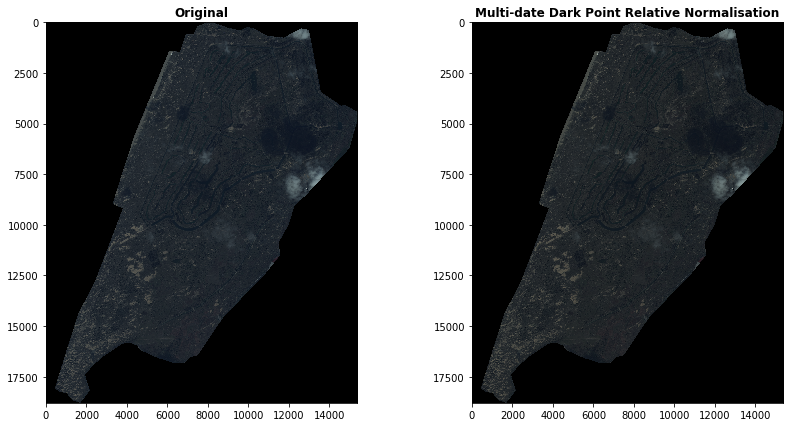

In [9]:
for path_to_tif in glob.glob("C:/repos/satellite-images-nso/output/*50cm*aaneensluitende_polygon_cropped.tif"):
    print(path_to_tif)
    
    if path_to_tif not in done_files: 
        red_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif]['r_diff'].values[0]
        blue_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif]['b_diff'].values[0]
        green_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif]['g_diff'].values[0]
        nir_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif]['i_diff'].values[0]
        plot_tif_with_RGBI_coefficitiens(path_to_tif.replace("\\","/"), blue_diff_add, green_diff_add, red_diff_add, nir_diff_add)

In [10]:
path_to_tif = "C:/repos/satellite-images-nso/output/waterleiding_duinen\\20200326_114321_SV1-02_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif"

C:/repos/satellite-images-nso/output/waterleiding_duinen/20200326_114321_SV1-02_SV_RD_11bit_RGBI_50cm_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif
47.0 65.0 59.0 -22.0


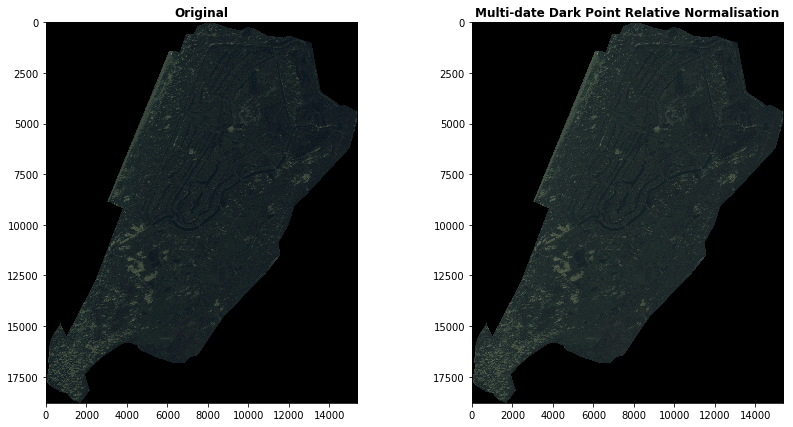

In [14]:
red_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif.replace("/waterleiding_duinen","")]['r_diff'].values[0]
blue_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif.replace("/waterleiding_duinen","")]['b_diff'].values[0]
green_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif.replace("/waterleiding_duinen","")]['g_diff'].values[0]
nir_diff_add = spot_arg_df[spot_arg_df['filename'] == path_to_tif.replace("/waterleiding_duinen","")]['i_diff'].values[0]
plot_tif_with_RGBI_coefficitiens(path_to_tif.replace("\\","/"), blue_diff_add, green_diff_add, red_diff_add, nir_diff_add)

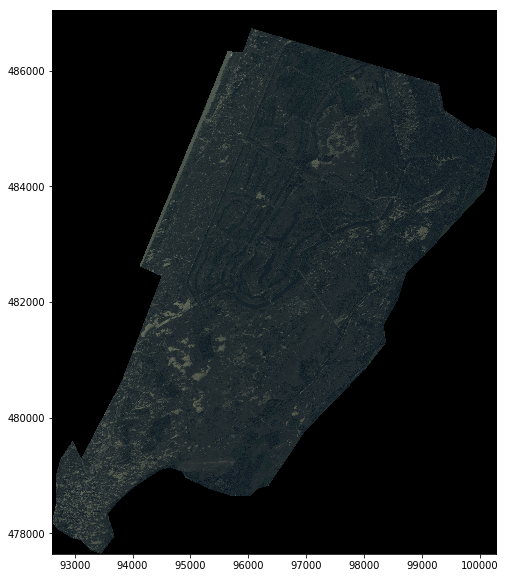

In [60]:
nso_miscellaneous.plot_tif_file('C:/repos/satellite-images-nso/output/20190729_111526_SV1-04_50cm_RD_11bit_RGBI_Lisse_waterleidingduin_aaneensluitende_polygon_cropped.tif')

In [ ]:
#Old normalisation and old code:
red = []
green = []
blue = []

for aarray in blackspot_array:
    print(red.append(aarray[1][0][0][0]))
    print(green.append(aarray[1][1][0][0]))
    print(blue.append(aarray[1][2][0][0]))

red_median = pd.Series(red).median()
green_median = pd.Series(green).median()
blue_median = pd.Series(blue).median()
blackspot_coefficients = []

for blackspot in blackspot_array:  
    print(red_median-blackspot[1][0][0][0])
    blackspot_coefficients.append([blackspot[0],[red_median-blackspot[1][0][0][0], green_median-blackspot[1][1][0][0],blue_median-blackspot[1][2][0][0]]])

blackspot_coefficients[2][1]

pd.DataFrame(blackspot_coefficients).to_csv("")

blackspot_coefficients = pd.read_csv("blackspot_coefficients.csv")

path_to_tif = blackspot_coefficients['0'][3].replace("\\","/")

path_to_tif


blue_diff_add = float(blackspot_coefficients['1'][3].replace("[","").replace("]","").split(",")[0])
green_diff_add = float(blackspot_coefficients['1'][3].replace("[","").replace("]","").split(",")[1])
red_diff_add = float(blackspot_coefficients['1'][3].replace("[","").replace("]","").split(",")[2])
nir_diff_add = 0

# Cut to a smaller region.

# Code from other notebook.